In [2]:
# This script contains a neural-net algorithm to distinguish between 3 particle types (pions, kaons, and muons)
# The code is based on the sci-kit learn example by jackfrost373, also available in the present Git-repository


import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get training data from the simulation-tree
tfile = uproot.open('/home/Shared/lhcbdata/davinci_MC_PID.root')
tree = tfile["PiTree/DecayTree"]
df = tree.pandas.df()
#print(df.head())


In [3]:
# make new PID label abs (so that particles and their antis are seen equivalently)
df['absid'] = df['pi_TRUEID'].abs()

print(df['absid'].value_counts()) # number of times each particle was detected

211     60058
321     11217
0        9015
2212     6650
13       4983
11       3616
3222       34
3112       10
3312        4
Name: absid, dtype: int64


In [4]:
# make cuts on dataset 
# pion = 211, kaon = 321, proton = 2212

crit_global = (df['pi_TRACK_time_err'] > 0.1) & (df['pi_P'] > 1200) #insert threshold values for track time error and momentum
crit_types  = (abs(df['pi_TRUEID']) == 211) |  (abs(df['pi_TRUEID']) == 2212) # only pion or kaon or proton
dfsel = df[crit_global & crit_types]
#print(dfsel)

#(abs(df['pi_TRUEID']) == 321) |

In [5]:
# define 'attributes' to train on: (i.e. which variables?)

##########################
attributesTRACK = ['TrackP','TrackPt','TrackChi2PerDof','TrackNumDof','TrackLikelihood','TrackFitTChi2','TrackFitTNDoF','TrackFitMatchChi2',
                     'TrackGhostProbability','TrackCloneDist','TrackFitVeloChi2','TrackFitVeloNDoF',]
attributesRICH = ['RichUsedAero', 'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres', 'RichAboveKaThres']
attributesDLLS = ['RichDLLe','RichDLLmu','RichDLLk','RichDLLp','RichDLLbt']
attributesCALO = ['EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe']
attributesOther = ['VeloCharge', 'pi_TRACK_time','pi_TRACK_time_err']
attributes = attributesTRACK + attributesRICH + attributesDLLS + attributesCALO + attributesOther
X = dfsel.loc[ :, attributes ]

#print(X.head())


In [6]:
# define the numerical IDs (e.g ±211) as'labels' for the distinct particle types

y = dfsel['absid'].astype('category')
print(y.head())

0    211
2    211
3    211
4    211
6    211
Name: absid, dtype: category
Categories (2, int64): [211, 2212]


In [7]:
# split sample into training and testing sets w/ an inbuilt scikit function
#for that: input data and the labels that classify it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)




In [ ]:

# Now follows the machine learning bit...

In [8]:
# feature scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  


In [9]:
#train with My little pony... 
print("Training...") 
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(len(attributes), int(len(attributes)/2), 10), max_iter=200, activation='relu', solver='adam', verbose=1)
mlp.fit(X_train, y_train.values.ravel())


Training...
Iteration 1, loss = 0.35761412
Iteration 2, loss = 0.18016851
Iteration 3, loss = 0.12745583
Iteration 4, loss = 0.12011086
Iteration 5, loss = 0.11570682
Iteration 6, loss = 0.11455155
Iteration 7, loss = 0.11267342
Iteration 8, loss = 0.11185832
Iteration 9, loss = 0.11123471
Iteration 10, loss = 0.11035007
Iteration 11, loss = 0.10909068
Iteration 12, loss = 0.10803450
Iteration 13, loss = 0.10769587
Iteration 14, loss = 0.10726678
Iteration 15, loss = 0.10710954
Iteration 16, loss = 0.10638107
Iteration 17, loss = 0.10533464
Iteration 18, loss = 0.10544921
Iteration 19, loss = 0.10480564
Iteration 20, loss = 0.10395133
Iteration 21, loss = 0.10370600
Iteration 22, loss = 0.10365751
Iteration 23, loss = 0.10325956
Iteration 24, loss = 0.10302905
Iteration 25, loss = 0.10290665
Iteration 26, loss = 0.10215544
Iteration 27, loss = 0.10216074
Iteration 28, loss = 0.10174494
Iteration 29, loss = 0.10216133
Iteration 30, loss = 0.10133444
Iteration 31, loss = 0.10106815
Itera

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 16, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [10]:
# make label predictions on test data
predictions = mlp.predict(X_test)

# evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))
print("Classification report:")
print(classification_report(y_test,predictions))

Confusion matrix:
[[10201   205]
 [  280   838]]
Classification report:
              precision    recall  f1-score   support

         211       0.97      0.98      0.98     10406
        2212       0.80      0.75      0.78      1118

   micro avg       0.96      0.96      0.96     11524
   macro avg       0.89      0.86      0.88     11524
weighted avg       0.96      0.96      0.96     11524



In [ ]:
# cell reserved to "read in" experimental data later
...



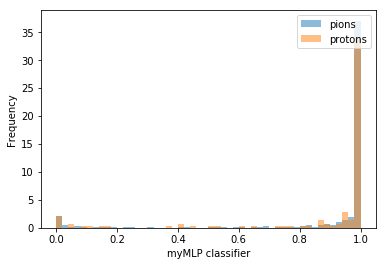

<Figure size 432x288 with 0 Axes>

In [24]:
# create a classification variable based on the prediction probability
probabilities = mlp.predict_proba(X_test) # gives list of [prob_pion, prob_kaon]
class_var = np.array( [ probabilities[i][0] for i in range(len(y_test)) ] ) # list of prob_pion
y_labels = np.array([y_test[:][i] for i in range(len(y_test)) ] ) #this is the original testing data 
y_labels_b = (y_labels==211).astype(int)

df_test = pd.DataFrame(data=X_test, columns=attributes)
df_test["myMLP"] = class_var
df_test["absid"] = y_test

# plot this variable for the 3 categories, aka particle types
crit_pion = df_test['absid'] == 211
#crit_kaon = df_test['absid'] == 321
crit_proton = df_test['absid'] == 2212
df_test_pions = df_test[crit_pion]
#df_test_kaons = df_test[crit_kaon]
df_test_protons = df_test[crit_proton]

df_test_pions["myMLP"].plot.hist(bins=50, range=(0,1), alpha=0.5, density=True, label="pions")
#df_test_kaons["myMLP"].plot.hist(bins=50, range=(0,1), alpha=0.5, density=True, label="kaons")
df_test_protons["myMLP"].plot.hist(bins=50, range=(0,1), alpha=0.5, density=True, label="protons")
plt.legend(loc='upper right')
plt.xlabel("myMLP classifier")
plt.show()

f = plt.figure()
f.savefig("myMLP_performance.pdf", bbox_inches='tight')

In [23]:
#plot ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
fpr, tpr , thresholds = roc_curve(y_labels_b, class_var)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
#plt.legend(loc='best')
plt.show()



[211 211 211 ... 211 211 211]


[211 211 211 ... 211 211 211]


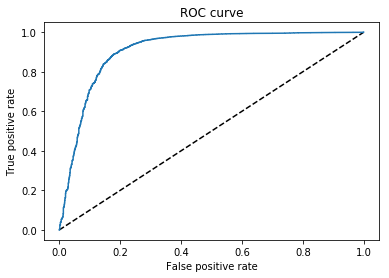